### Presenting data in multiple ways

Using Google Playstore data from Kaggle
1. Choose one variable and plot four different ways
2. Choose two continuous variables, and plot three different ways
3. Choose one continuous variable and one categorical variable, and plot six different ways

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)

### Cleaning data

I modified price data to remove symbols and change to a float type for analytical purposes. I also removed any apps at or above $50 because frequently those that are too expensive are gags.

In [3]:
df = pd.read_csv('google-app-data/googleplaystore.csv')

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
df.Price = [x.strip('$') for x in df.Price]

In [8]:
df.Price.unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       'Everyone', '1.20', '1.04'], dtype=object)

I found the faulty entry from an error when trying to convert Price to float

In [9]:
df.iloc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                                 19
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

In [10]:
df = df.dropna()

In [11]:
df.Price = pd.to_numeric(df.Price)

In [12]:
df = df[df.Price < 50]

In [13]:
df.Rating.dropna()

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
5        4.4
6        3.8
7        4.1
8        4.4
9        4.7
10       4.4
11       4.4
12       4.2
13       4.6
14       4.4
16       4.7
17       4.5
18       4.3
19       4.6
20       4.0
21       4.1
22       4.7
24       4.7
25       4.8
26       4.7
27       4.1
28       3.9
29       4.1
30       4.2
31       4.1
        ... 
10795    4.2
10796    4.7
10797    4.6
10799    4.7
10800    4.1
10801    4.9
10802    4.0
10803    4.3
10804    4.2
10805    4.3
10809    4.7
10810    4.8
10812    4.1
10814    4.0
10815    4.2
10817    4.0
10819    3.3
10820    5.0
10826    4.0
10827    4.2
10828    3.4
10829    4.6
10830    3.8
10832    3.8
10833    4.8
10834    4.0
10836    4.5
10837    5.0
10839    4.5
10840    4.5
Name: Rating, Length: 9343, dtype: float64

In [14]:
df.describe()

,Rating,Price
count,9343.000000,9343.000000
mean,4.192272,0.317642
std,0.515321,1.830550
min,1.000000,0.000000
25%,4.000000,0.000000
50%,4.300000,0.000000
75%,4.500000,0.000000
max,5.000000,39.990000


## Choose one variable and plot it four different ways

Variable: Ratings


1. histogram
2. density
3. boxplot
4. violin

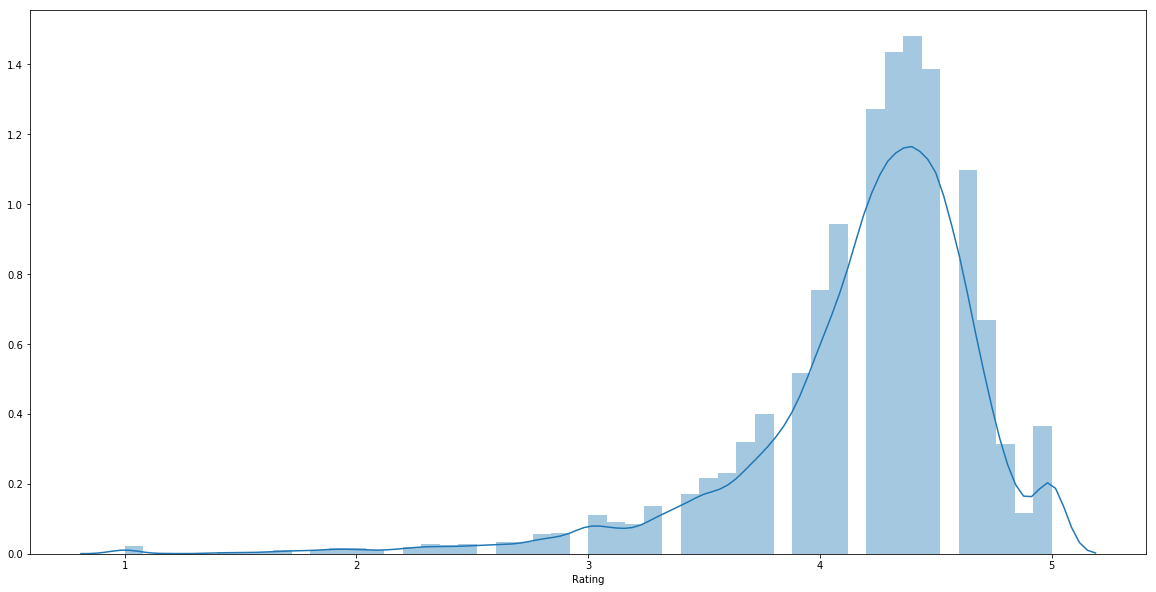

In [15]:
# histogram with density
sns.distplot(df.Rating);

The histogram plot is an easy way to represent the spread of values of a given continuous variable.

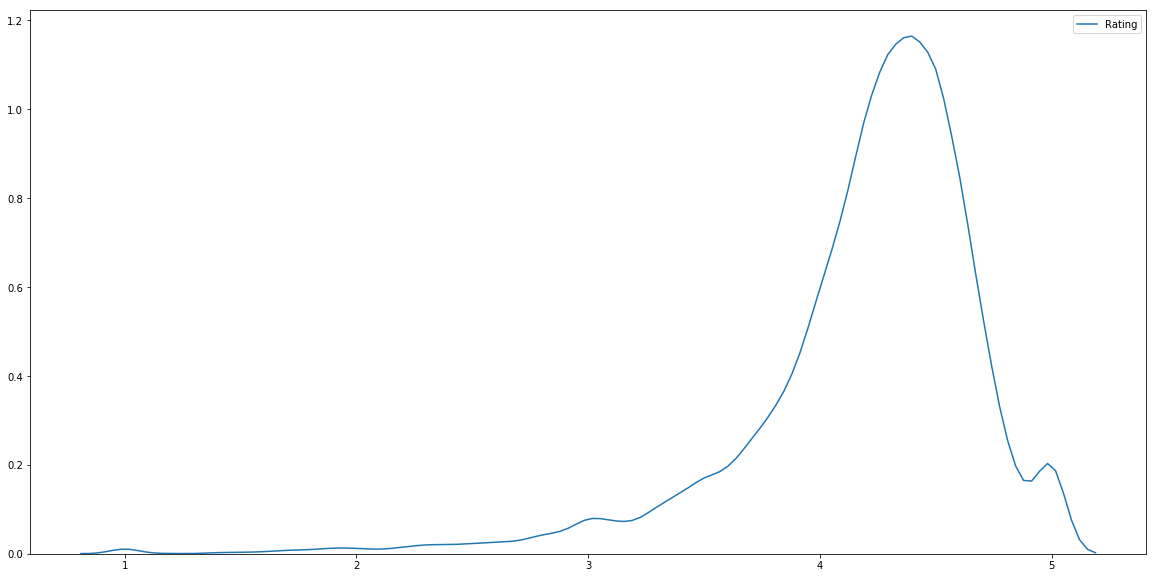

In [16]:
# density plot
sns.kdeplot(df.Rating);

The density plot shows data in a similar way as the histogram, however information is reduced. You can't compare between ratings because the true values are not depicted. It's impossible to tell if, for instance, there are values along the rating of 4, or if there is a giant gap that is covered up by a large cluster around 4.25. This plot is likely better than a histogram if one wanted to compare the spread of multiple continous variables.

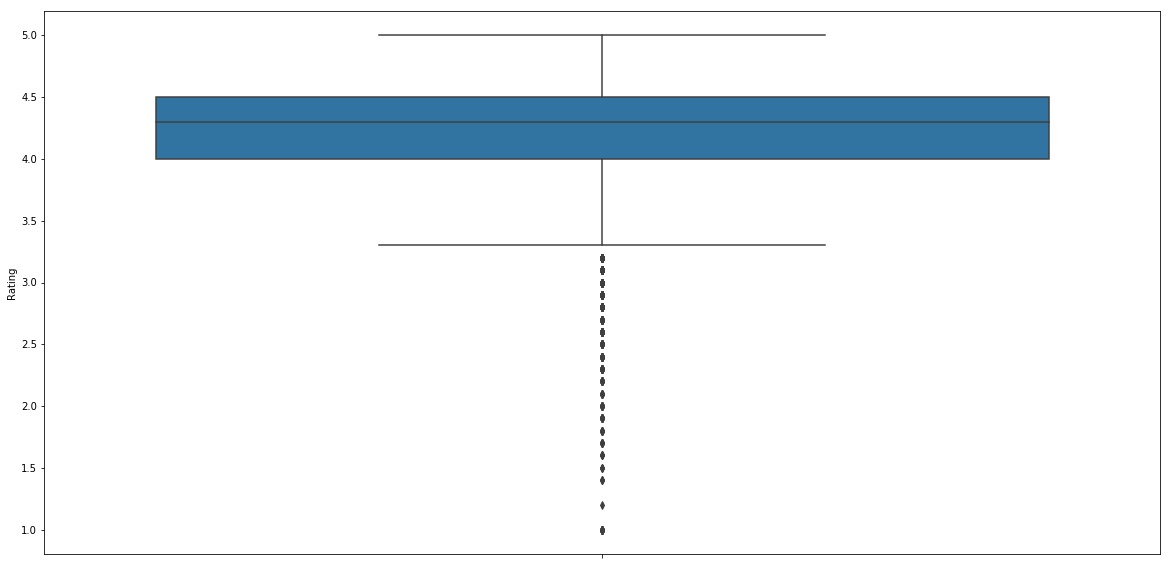

In [17]:
# boxplot
sns.boxplot(y=df.Rating)

Boxplots are good for showing a lot of information related to sample distribution, such as: median, quartiles, outliers. However, boxplots also lack the visualizations of number of data points within the interquartile ranges.

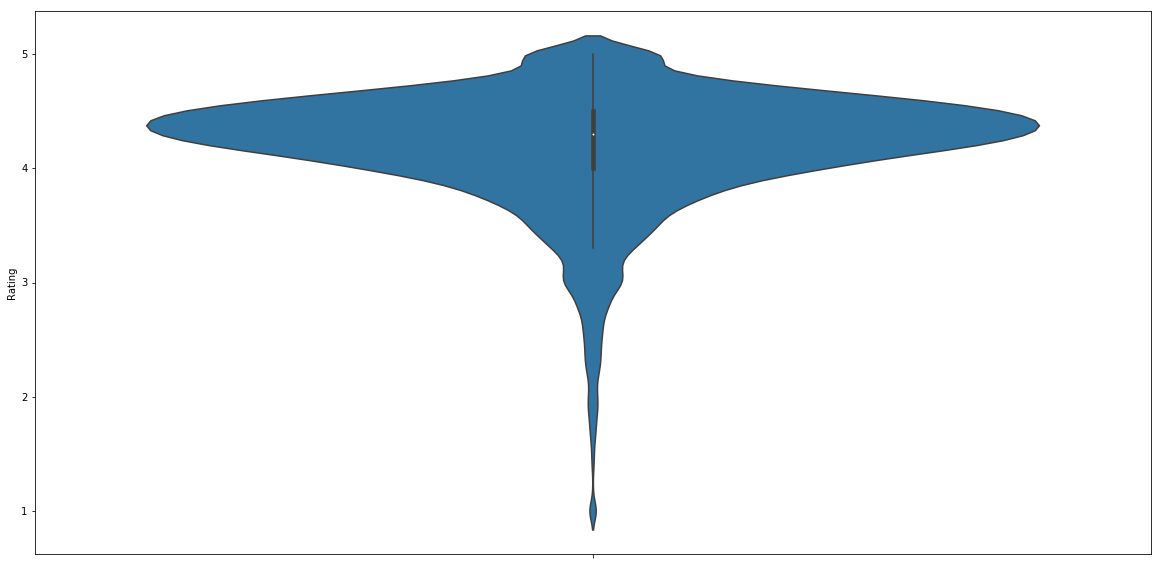

In [18]:
# violin plot
sns.violinplot(y=df.Rating)

Violin plots is similar to a boxplot, but with an emphasis on value density that is missing in a boxplot. Focus is taken away from the median and quartiles.

## Choose two continuous variables and plot them three different ways

Variables: Ratings, Price

1. Scatterplot
2. 2D Histogram
3. Lollipop plot

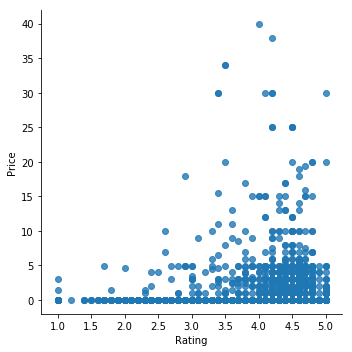

In [29]:
# scatterplot
sns.lmplot('Rating', 'Price', data=df, fit_reg=False)

A great way to visualize patterns, such as clustering of data points, as well as outliers. This plot becomes less effective the farther outliers lie (eventually, it will be hard to see the spread of data points when the axes are zoomed out enough to fit significant outliers). Information loss can also occur as it has above when there are too many data points overlapping that one can no longer see individual dots.

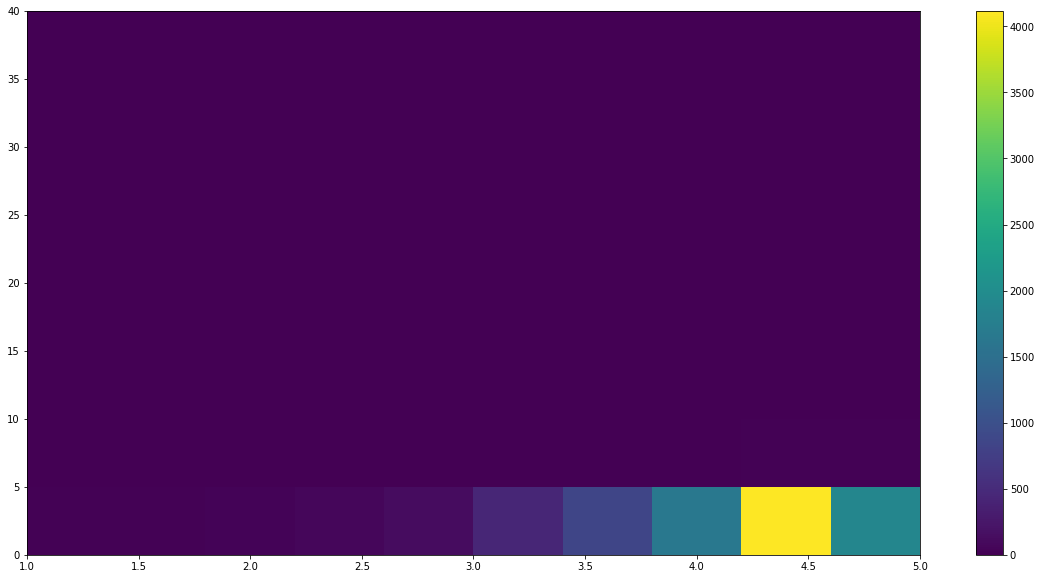

In [20]:
plt.hist2d(df.Rating, df.Price, bins=(10, 8))
plt.colorbar()
plt.show()

In general, a 2D histogram is a great way to overcome the issue of overplotting a clustering of data points in a scatterplot. However, data can be readily manipulated depending on binning (much like a regular histogram). A lot of data heree is also lost, as I see very little spread outside of the $5 range, despite the fact that the scatter plot above clearly indicates there are many apps that cost greater than that amount.

<StemContainer object of 3 artists>

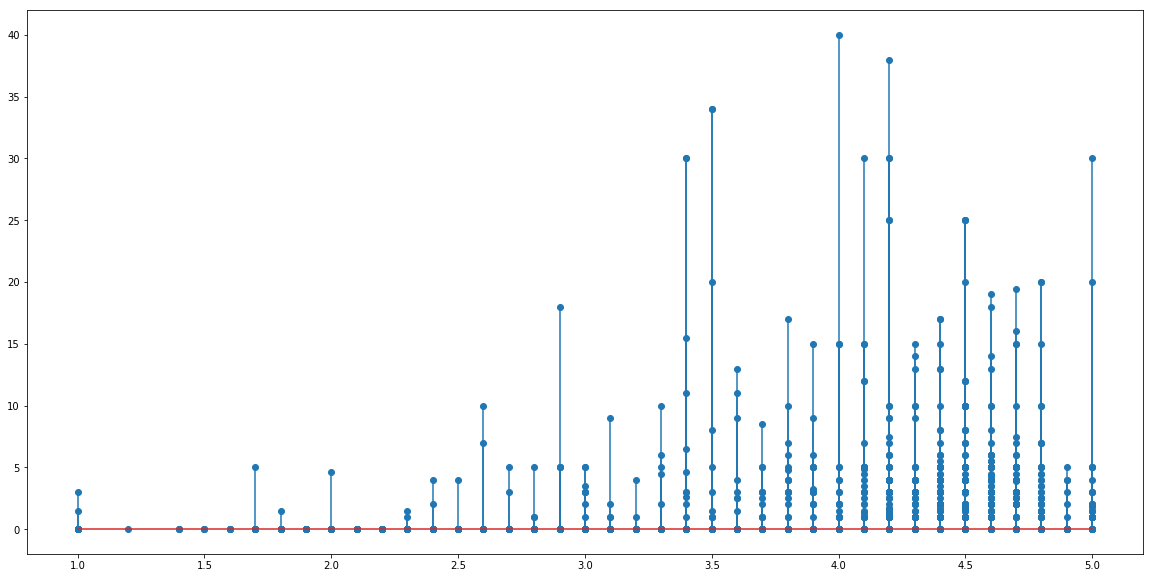

In [21]:
# lollipop
plt.stem(df.Rating, df.Price)

Similar to a scatter plot, the lollipop plot can also be used to compare a numerical variable with one that is categorical or numerical. 

## Choose one continuous variable and one categorical variable and plot them six different ways

Variables: Content rating, Price

1. Categorical scatterplot
2. Boxplot
3. Violinplot
4. Barplot
5. Point plot
6. Swarm categorical scatterplot

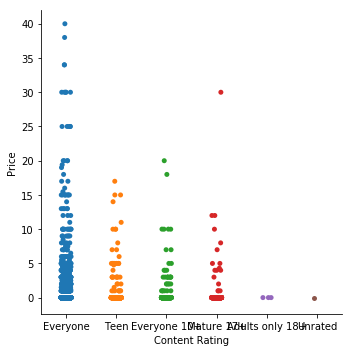

In [22]:
# Category and Price
sns.catplot(x='Content Rating', y='Price', data=df);

Category scatterplot is a useful way to compare the spread of numerical values across several categories, though the problem of overplotting (as with regular scatterplots) remains.

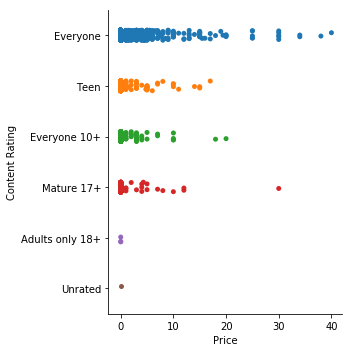

In [31]:
# rotated categorical scatterplot
sns.catplot(x='Price', y='Content Rating', data=df)

There are enough categories and the names long enough that it's more visibly pleasing to rotate the axes, compared to the plot before this one.

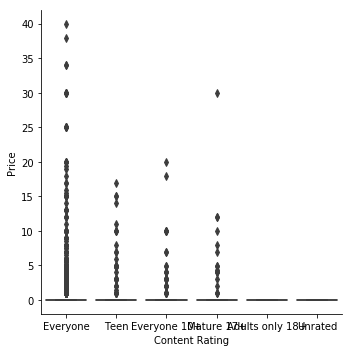

In [23]:
#  boxplot
sns.catplot(x='Content Rating', y='Price', kind='box', data=df)

Boxplots is a good way to visualize patterns or differences across categories if there is a more evenly spread distribution. As seen above, this is not a good example since only information about outliers are present here.

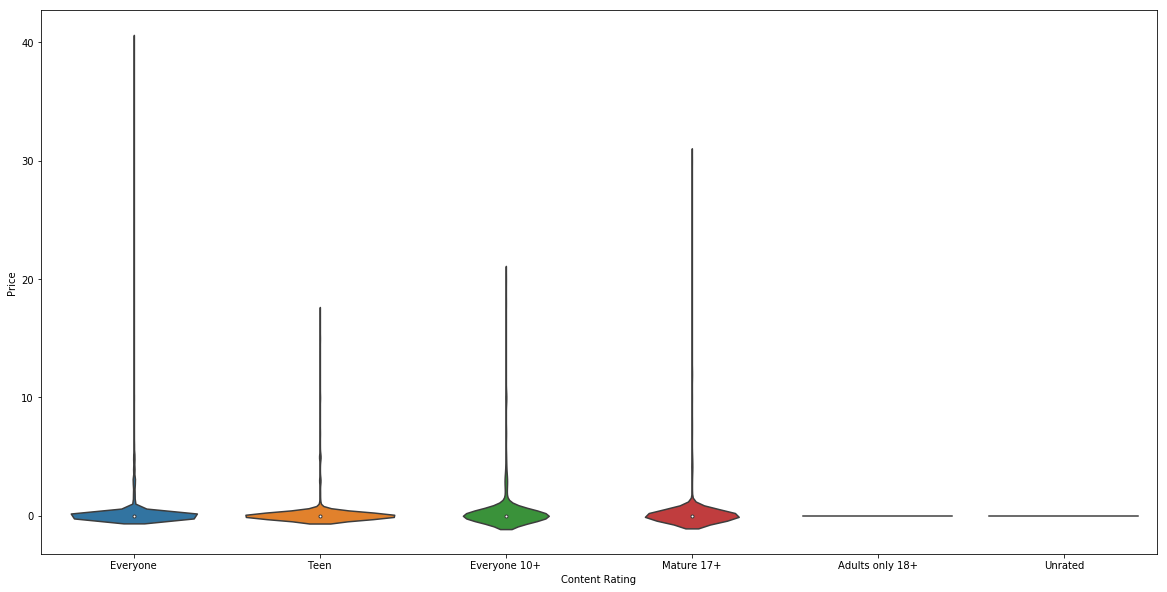

In [24]:
# violin plot
sns.violinplot(x=df['Content Rating'], y=df['Price'])

Similar issues here as with the categorical boxplot above. It can be an excellent way to look at density distributions across a numerical value across groups, but since most of the apps are $0, there isn't much of a distribution to look at.

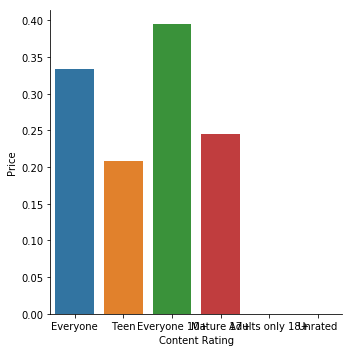

In [25]:
# barplot
sns.catplot(x='Content Rating', y='Price', kind='bar', data=df, ci=None)

Barplots are more limited in the information it provides. It only shows the mean for a given group, and as an example above, is highly susceptible to outliers. Really, all that the information here shows is what group is the most affected by outliers, since most apps are sold for free.

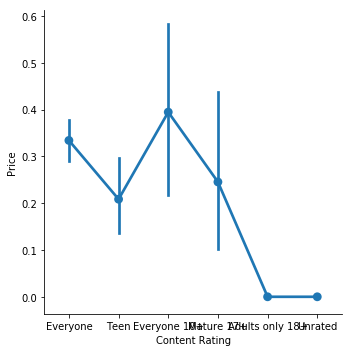

In [26]:
# point plot
sns.catplot(x='Content Rating', y='Price', kind='point', data=df)

The point plot here has the same weakness as the barplots. The only time I believe a point plot would be better than a bar plot is if aesthetic minimalism is being sought after, or, if there are multiple series of point plots that will be stacked over each other for greater visibility.